# Exposures class

Exposure can describe the geographical distribution of people, livelihoods and assets or infrastructure; all items potentially exposed to hazards. It is represented in the class `Exposures`, which is a [GeoDataFrame](https://geopandas.readthedocs.io/en/latest/data_structures.html#geodataframe) of Python's library [geopandas](https://geopandas.readthedocs.io/en/latest/gallery/cartopy_convert.html).

The variables (columns) and metada contained are:

 * tag (Tag): metada - information about the source data
 * ref_year (int): metada - reference year
 * value_unit (str): metada - unit of the exposures values
 * **latitude** (pd.Series): latitude
 * **longitude** (pd.Series): longitude
 * **value** (pd.Series): a value for each exposure
 * **if_*** (pd.Series): e.g. if_TC: impact functions ids for hazard TC. There might be different hazards defined: if_TC, if_FL, ...
 * geometry (pd.Series, optional): geometry of type Point of each instance. Computed in method `set_geometry_points()`
 * deductible (pd.Series, optional): deductible value for each exposure. Used for insurance
 * cover (pd.Series, optional): cover value for each exposure. Used for insurance
 * category_id (pd.Series, optional): category id (e.g. building code) for each exposure
 * region_id (pd.Series, optional): region id (e.g. country ISO code) for each exposure
 * centr_* (pd.Series, optional): e.g. centr_TC. centroids index for hazard TC. There might be different hazards defined: centr_TC, centr_FL, ... Computed in method `assign_centroids()`

Some of the variables are *optional*. This means that the package `climada.engine` also works without these variables. For instance, the `region_id` and `category_id` values only provide additional information, whilst the `centr_*` variable can be computed if not provided using the method `assign_centroids()`. The attibute `geometry` is only needed to execute the methods of `geopandas` and can be set using the method `set_geometry_points()`.

After defining an `Exposures` instance use always the `check()` method to see which attributes are missing. This method will raise an Error if `value`, `longitude`, `latitude` or `if_*` are not set.

## Define Exposures from a DataFrame

In [1]:
import numpy as np
from pandas import DataFrame
from climada.entity import Exposures

# Fill DataFrame
exp_df = DataFrame()
n_exp = 100*100
exp_df['value'] = np.arange(n_exp) # provide value
lat, lon = np.mgrid[15 : 35 : complex(0, np.sqrt(n_exp)), 20 : 40 : complex(0, np.sqrt(n_exp))]
exp_df['latitude'] = lat.flatten() # provide latitude
exp_df['longitude'] = lon.flatten() # provide longitude
exp_df['if_TC'] = np.ones(n_exp, int) # provide impact functions for TC or any other peril

print('\x1b[1;03;30;30m' + 'exp_df is a DataFrame:', str(type(exp_df)) + '\x1b[0m')
print('\x1b[1;03;30;30m' + 'exp_df looks like:' + '\x1b[0m')
print(exp_df.head())

# Generate Exposures
exp_df = Exposures(exp_df)
print('\n' + '\x1b[1;03;30;30m' + 'exp_df is now an Exposures:', str(type(exp_df)) + '\x1b[0m')
exp_df.set_geometry_points() # set geometry attribute (shapely Points) from GeoDataFrame from latitude and longitude
print('\n' + '\x1b[1;03;30;30m' + 'check method logs:' + '\x1b[0m')
exp_df.check()

print('\n' + '\x1b[1;03;30;30m'  + 'exp_df looks like:' + '\x1b[0m')
print(exp_df.head())

2019-02-27 11:44:17,042 - climada - DEBUG - Loading default config file: /Users/aznarsig/Documents/Python/climada_python/climada/conf/defaults.conf


/Users/aznarsig/anaconda3/envs/climada_env_new/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


exp_df is a DataFrame: <class 'pandas.core.frame.DataFrame'>
exp_df looks like:
   value  latitude  longitude  if_TC
0      0      15.0  20.000000      1
1      1      15.0  20.202020      1
2      2      15.0  20.404040      1
3      3      15.0  20.606061      1
4      4      15.0  20.808081      1

exp_df is now an Exposures: <class 'climada.entity.exposures.base.Exposures'>
2019-02-27 11:44:18,678 - climada.entity.exposures.base - INFO - Setting geometry attribute.

check method logs:
2019-02-27 11:44:18,750 - climada.entity.exposures.base - INFO - tag metadata set to default value:  File: 
 Description: 
2019-02-27 11:44:18,751 - climada.entity.exposures.base - INFO - ref_year metadata set to default value: 2018
2019-02-27 11:44:18,751 - climada.entity.exposures.base - INFO - value_unit metadata set to default value: USD
2019-02-27 11:44:18,752 - climada.entity.exposures.base - INFO - centr_ not set.
2019-02-27 11:44:18,755 - climada.entity.exposures.base - INFO - deductible not s

## Define Exposures from a GeoDataFrame with POINT geometry

In [2]:
import numpy as np
import geopandas as gpd
from climada.entity import Exposures

# Fill GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
print('\x1b[1;03;30;30m' + 'World is a GeoDataFrame:', str(type(world)) + '\x1b[0m')
print('\x1b[1;03;30;30m' + 'World looks like:' + '\x1b[0m')
print(world.head())

# Generate Exposures
exp_gpd = Exposures(world)
print('\n' + '\x1b[1;03;30;30m' + 'exp_gpd is now an Exposures:', str(type(exp_gpd)) + '\x1b[0m')
exp_gpd['value'] = np.arange(world.shape[0]) # provide value
exp_gpd.set_lat_lon() # set latitude and longitude attributes from geometry
exp_gpd['if_TC'] = np.ones(world.shape[0], int) # provide impact functions for TC or any other peril

print('\n' + '\x1b[1;03;30;30m' + 'check method logs:' + '\x1b[0m')
exp_gpd.check()

print('\n' + '\x1b[1;03;30;30m'  + 'exp_gpd looks like:' + '\x1b[0m')
print(exp_gpd.head())

World is a GeoDataFrame: <class 'geopandas.geodataframe.GeoDataFrame'>
World looks like:
           name                                     geometry
0  Vatican City  POINT (12.45338654497177 41.90328217996012)
1    San Marino    POINT (12.44177015780014 43.936095834768)
2         Vaduz  POINT (9.516669472907267 47.13372377429357)
3    Luxembourg  POINT (6.130002806227083 49.61166037912108)
4       Palikir  POINT (158.1499743237623 6.916643696007725)

exp_gpd is now an Exposures: <class 'climada.entity.exposures.base.Exposures'>
2019-02-27 11:44:18,810 - climada.entity.exposures.base - INFO - Setting latitude and longitude attributes.

check method logs:
2019-02-27 11:44:18,820 - climada.entity.exposures.base - INFO - tag metadata set to default value:  File: 
 Description: 
2019-02-27 11:44:18,821 - climada.entity.exposures.base - INFO - ref_year metadata set to default value: 2018
2019-02-27 11:44:18,823 - climada.entity.exposures.base - INFO - value_unit metadata set to default valu

## Read Exposures of an excel file

Excel files can be ingested directly following the template provided in `climada_python/data/system/entity_template.xlsx`, in the sheet `assets`.

In [3]:
# An excel file with the variables defined in the template can be directly ingested using these commands
import pandas as pd
from climada.util.constants import ENT_TEMPLATE_XLS
from climada.entity import Exposures

# Fill DataFrame from Excel file
file_name = ENT_TEMPLATE_XLS # provide absolute path of the excel file
exp_templ = pd.read_excel(file_name)

print('\x1b[1;03;30;30m' + 'exp_templ is a DataFrame:', str(type(exp_templ)) + '\x1b[0m')
print('\x1b[1;03;30;30m' + 'exp_templ looks like:' + '\x1b[0m')
print(exp_templ.head())

# Generate Exposures
exp_templ = Exposures(exp_templ)
print('\n' + '\x1b[1;03;30;30m' + 'exp_templ is now an Exposures:', str(type(exp_templ)) + '\x1b[0m')
exp_templ.set_geometry_points() # set geometry attribute (shapely Points) from GeoDataFrame from latitude and longitude
print('\n' + '\x1b[1;03;30;30m' + 'check method logs:' + '\x1b[0m')
exp_templ.check()

print('\n' + '\x1b[1;03;30;30m'  + 'exp_templ looks like:' + '\x1b[0m')
print(exp_templ.head())

exp_templ is a DataFrame: <class 'pandas.core.frame.DataFrame'>
exp_templ looks like:
    latitude  longitude         value  deductible         cover  region_id  \
0  26.933899 -80.128799  1.392750e+10           0  1.392750e+10          1   
1  26.957203 -80.098284  1.259606e+10           0  1.259606e+10          1   
2  26.783846 -80.748947  1.259606e+10           0  1.259606e+10          1   
3  26.645524 -80.550704  1.259606e+10           0  1.259606e+10          1   
4  26.897796 -80.596929  1.259606e+10           0  1.259606e+10          1   

   category_id  if_TC  centr_TC  if_FL  centr_FL  
0            1      1         1      1         1  
1            1      1         2      1         2  
2            1      1         3      1         3  
3            1      1         4      1         4  
4            1      1         5      1         5  

exp_templ is now an Exposures: <class 'climada.entity.exposures.base.Exposures'>
2019-02-27 11:44:18,909 - climada.entity.exposures.base -

## Read Exposures of any file type supported by GeoDataFrame and DataFrame

Geopandas can read almost any vector-based spatial data format including ESRI shapefile, GeoJSON files and more, see [readers geopandas](http://geopandas.org/io.html). Pandas supports formats such as csv, html or sql; see [readers pandas](https://pandas.pydata.org/pandas-docs/stable/io.html). Using the corresponding readers, `DataFrame` and `GeoDataFrame` can be filled and provided to `Exposures` following the previous examples.

## Visualize Exposures

The method `plot_hexbin()` uses `cartopy`  and `matplotlib`'s `hexbin` function to represent the exposures values over a map. Configure your plot by fixing the different inputs of the method or by modifying the returned `matplotlib` figure and axes.

Plotting exp_df.


(10, 40)

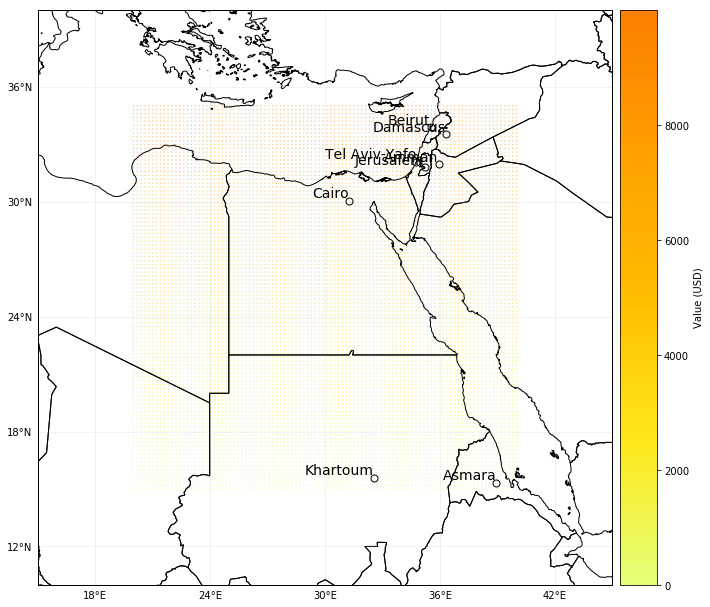

In [4]:
# execute 'Define Exposures from a DataFrame' to see the results
print('\x1b[1;03;30;30m' + 'Plotting exp_df.' + '\x1b[0m')
fig, axs = exp_df.plot_hexbin()
axs[0, 0].set_xlim(15, 45)
axs[0, 0].set_ylim(10, 40)

Plotting exp_gpd.


(<Figure size 648x936 with 2 Axes>,
 array([[<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x1a1335a828>]],
       dtype=object))

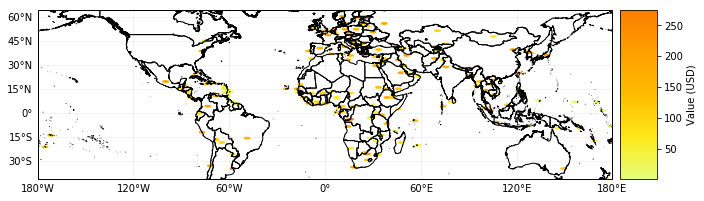

In [5]:
# execute 'Define Exposures from a GeoDataFrame with POINT geometry' to see the results
print('\x1b[1;03;30;30m' + 'Plotting exp_gpd.' + '\x1b[0m')
exp_gpd.plot_hexbin(pop_name=False)

Plotting exp_templ.


(<Figure size 648x936 with 2 Axes>,
 array([[<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x1a27a5dc88>]],
       dtype=object))

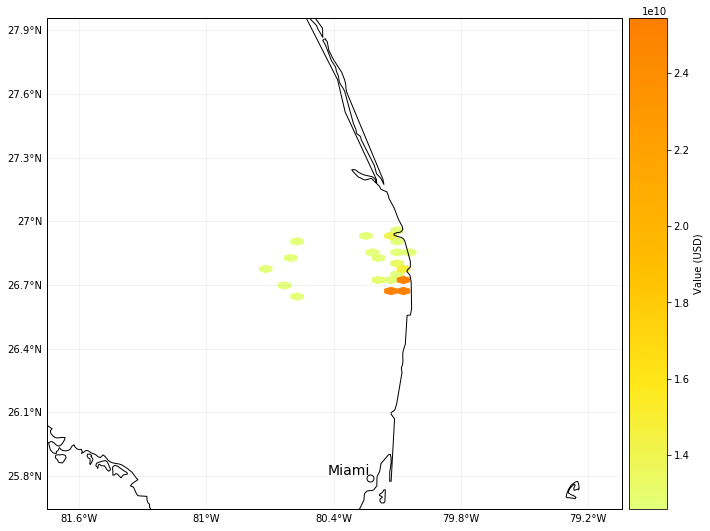

In [6]:
# execute 'Define Exposures from an excel file' to see the results
print('\x1b[1;03;30;30m' + 'Plotting exp_templ.' + '\x1b[0m')
exp_templ.plot_hexbin(buffer_deg=1.0)

Since `Exposures` is a `GeoDataFrame`, any function for visualization from geopandas can be used. Check [making maps](https://geopandas.readthedocs.io/en/latest/mapping.html#) and [examples gallery](http://geopandas.org/gallery/index.html).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27a64080>]],
      dtype=object)

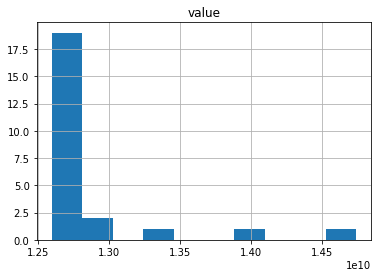

In [7]:
# other visualization types
exp_templ.hist(column='value')

## Other methods 

In [8]:
# read MATLAB file from climada MATLAB version
from climada.util.constants import ENT_DEMO_MAT

exp_mat = Exposures()
exp_mat.read_mat(ENT_DEMO_MAT)
print(type(exp_mat))

<class 'climada.entity.exposures.base.Exposures'>


In [9]:
# concatenate exposures
import pandas as pd
from geopandas import GeoDataFrame
from climada.entity import Exposures, Tag

df_all = GeoDataFrame(pd.concat([exp_mat, exp_templ, exp_df], ignore_index=True, sort=False))
exp_all = Exposures(df_all)
exp_all.tag = Tag(description='concatenation of exp_mat, exp_templ and exp_df')
exp_all.ref_year = 2010
exp_all.value_unit = 'USD'

# NaNs will appear in the missing values
exp_all

,value,latitude,longitude,if_,deductible,cover,category_id,centr_,region_id,if_TC,centr_TC,if_FL,centr_FL,geometry
0,1.392750e+10,26.933899,-80.128799,1.0,0.0,1.392750e+10,1.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.259606e+10,26.957203,-80.098284,1.0,0.0,1.259606e+10,1.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1.259606e+10,26.783846,-80.748947,1.0,0.0,1.259606e+10,1.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1.259606e+10,26.645524,-80.550704,1.0,0.0,1.259606e+10,1.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1.259606e+10,26.897796,-80.596929,1.0,0.0,1.259606e+10,1.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.259606e+10,26.925359,-80.220966,1.0,0.0,1.259606e+10,1.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN
6,1.259754e+10,26.914768,-80.074660,1.0,0.0,1.259754e+10,1.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN
7,1.259606e+10,26.853491,-80.190281,1.0,0.0,1.259606e+10,1.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN
8,1.262097e+10,26.845099,-80.083904,1.0,0.0,1.262097e+10,1.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN
9,1.259606e+10,26.826510,-80.213493,1.0,0.0,1.259606e+10,1.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# remove values
exp_mat_1 = exp_mat.drop([1]) # delete row 1
print('\x1b[1;03;30;30m' + 'Row 1 deleted:' + '\x1b[0m')
print(exp_mat_1.head())
exp_mat_val = exp_mat.drop(['value'], axis=1) # delete colomn 'value'
print('\x1b[1;03;30;30m' + 'Column value deleted:' + '\x1b[0m')
print(exp_mat_val.head())

Row 1 deleted:
          value   latitude  longitude  if_  deductible         cover  \
0  1.392750e+10  26.933899 -80.128799    1         0.0  1.392750e+10   
2  1.259606e+10  26.783846 -80.748947    1         0.0  1.259606e+10   
3  1.259606e+10  26.645524 -80.550704    1         0.0  1.259606e+10   
4  1.259606e+10  26.897796 -80.596929    1         0.0  1.259606e+10   
5  1.259606e+10  26.925359 -80.220966    1         0.0  1.259606e+10   

   category_id  centr_  
0            1      47  
2            1      37  
3            1      37  
4            1      37  
5            1      47  
Column value deleted:
    latitude  longitude  if_  deductible         cover  category_id  centr_
0  26.933899 -80.128799    1         0.0  1.392750e+10            1      47
1  26.957203 -80.098284    1         0.0  1.259606e+10            1      47
2  26.783846 -80.748947    1         0.0  1.259606e+10            1      37
3  26.645524 -80.550704    1         0.0  1.259606e+10            1      37


2019-02-27 11:44:35,871 - climada.entity.exposures.base - INFO - Adding sea at 5 km resolution and 10 km distance from coast.
2019-02-27 11:44:38,284 - climada.entity.exposures.base - INFO - Setting geometry attribute.
Plotting exp_templ_sea.


(<Figure size 648x936 with 2 Axes>,
 array([[<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x1a225c5710>]],
       dtype=object))

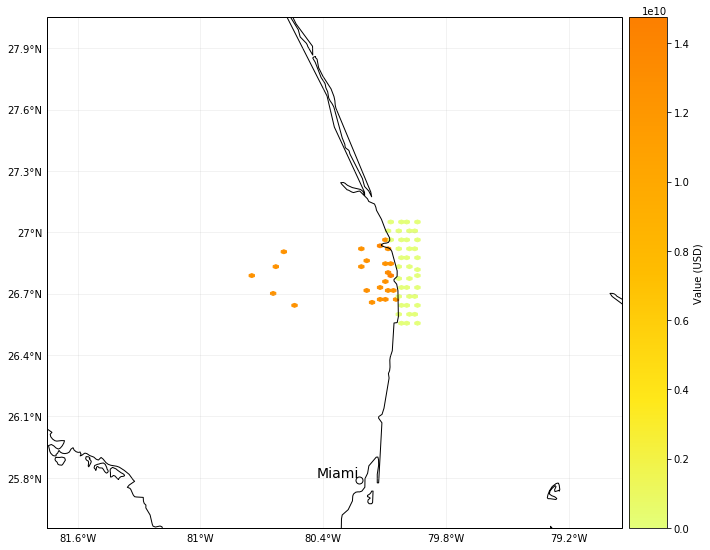

In [11]:
# add sea points
from climada.entity import add_sea
exp_templ_sea = add_sea(exp_templ, (10, 5)) # 10km from coast and at 5km resolution

print('\x1b[1;03;30;30m' + 'Plotting exp_templ_sea.' + '\x1b[0m')
exp_templ_sea.plot_hexbin(buffer_deg=1.0)

Have a look into all the possible methods provided by `GeoDataFrame`. They will allow you to perform operations like the following:

In [12]:
# extract data in a region: latitudes between -5 and 5
sel_exp = exp_gpd.cx[:, -5:5]
sel_exp

,name,geometry,value,latitude,longitude,if_TC
9,Tarawa,POINT (173.0175708285494 1.338187505624603),9,1.338188,173.017571,1
13,Kigali,POINT (30.05858591906411 -1.95164421006325),13,-1.951644,30.058586,1
15,Juba,POINT (31.58002559278731 4.829975198277964),15,4.829975,31.580026,1
27,Bujumbura,POINT (29.3600060615284 -3.376087220374643),27,-3.376087,29.360006,1
48,Kampala,POINT (32.58137766712105 0.318604813383331),48,0.318605,32.581378,1
65,Mogadishu,POINT (45.36473175245874 2.068627192947531),65,2.068627,45.364732,1
79,Quito,POINT (-78.5019969671124 -0.2130423220355624),79,-0.213042,-78.501997,1
84,Malabo,POINT (8.783277545821136 3.750015278026183),84,3.750015,8.783278,1
90,Libreville,POINT (9.457965045823698 0.3853886097185182),90,0.385389,9.457965,1
98,Brazzaville,POINT (15.28274363384867 -4.257239913197509),98,-4.257240,15.282744,1


In [13]:
# extract data in a polygon
from shapely.geometry import Polygon

poly = Polygon([(0, -10), (0, 10), (10, 5)])
sel_exp = exp_gpd[exp_gpd.intersects(poly)]
sel_exp

,name,geometry,value,latitude,longitude,if_TC
36,Lome,POINT (1.22081126074562 6.133882930268385),36,6.133883,1.220811,1
84,Malabo,POINT (8.783277545821136 3.750015278026183),84,3.750015,8.783278,1
113,Cotonou,POINT (2.518044740568598 6.401954422782467),113,6.401954,2.518045,1
125,Sao Tome,POINT (6.733325153234773 0.3334021188329075),125,0.333402,6.733325,1


## Write Exposures

Exposures can be saved in any format available for `GeoDataFrame` (see fiona.supported_drivers) and `DataFrame` ([pandas IO tools]('https://pandas.pydata.org/pandas-docs/stable/io.html')).

In [14]:
# GeoDataFrame formats
import fiona; fiona.supported_drivers

# GeoDataFrame default: ESRI shape file in current path. metadata not saved!
exp_templ.to_file('results/exp_templ')

# DataFrame save to csv format. geometry writen as string, metadata not saved!
exp_templ.to_csv('results/exp_templ_csv', sep='\t')

However, these methods will not save the meatada (e.g. variables `ref_year`, `value_unit` and `tag`). Use `Exposures`method `write_hdf5()` and `read_hdf5()` methods to write and read climada's exposures respectively.

In [15]:
# write
exp_templ.write_hdf5('results/exp_temp.h5')
# read
exp_read = Exposures()
exp_read.read_hdf5('results/exp_temp.h5')
exp_read.head()

/Users/aznarsig/anaconda3/envs/climada_env_new/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['geometry']]

  exec(code_obj, self.user_global_ns, self.user_ns)


,latitude,longitude,value,deductible,cover,region_id,category_id,if_TC,centr_TC,if_FL,centr_FL,geometry
0,26.933899,-80.128799,1.392750e+10,0,1.392750e+10,1,1,1,1,1,1,POINT (-80.128799 26.933899)
1,26.957203,-80.098284,1.259606e+10,0,1.259606e+10,1,1,1,2,1,2,POINT (-80.09828400000001 26.957203)
2,26.783846,-80.748947,1.259606e+10,0,1.259606e+10,1,1,1,3,1,3,POINT (-80.748947 26.783846)
3,26.645524,-80.550704,1.259606e+10,0,1.259606e+10,1,1,1,4,1,4,POINT (-80.550704 26.645524)
4,26.897796,-80.596929,1.259606e+10,0,1.259606e+10,1,1,1,5,1,5,POINT (-80.596929 26.897796)


As with any Python object, use climada's save option to save it in pickle format.

In [16]:
# save in pickle format
from climada.util.save import save
# this generates a results folder in the current path and stores the output there
save('exp_templ.pkl.p', exp_templ) # creates results folder and stores there

2019-02-27 11:44:42,033 - climada.util.save - INFO - Written file /Users/aznarsig/Documents/Python/climada_python/script/tutorial/results/exp_templ.pkl.p
